In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/MSci/SliceCast
! git pull

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/My Drive/MSci/SliceCast #gdrive/My Drive/MSci/SliceCast'
/content/gdrive/My Drive/MSci/SliceCast
Already up to date.


In [ ]:
! tar -xvf wiki_727K.tar.bz2

In [ ]:
# ! python -m pip install --upgrade pip setuptools

# ! pip3 install -r requirements.txt
# ! pip install objectpath
# ! pip install git+https://github.com/boudinfl/pke.git
# ! pip install keras==2.3.0 #1.15 doesnt exist

! pip install tensorflow==1.15
! pip install tensorflow_hub>=0.6.0
! pip3 install tensorflow_text==1.15


     |████████████████████████████████| 102kB 4.1MB/s 
     |████████████████████████████████| 163kB 7.0MB/s 
     |████████████████████████████████| 430kB 6.0MB/s 
     |████████████████████████████████| 10.8MB 6.9MB/s 
     |████████████████████████████████| 2.8MB 38.7MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 92kB 7.7MB/s 
     |████████████████████████████████| 17.3MB 184kB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 1.2MB 44.2MB/s 
     |████████████████████████████████| 163kB 45.4MB/s 
     |████████████████████████████████| 614kB 29.9MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 25.2MB 133kB/s 
     |████████████████████████████████| 3.0MB 37.0MB/s 
     |████████████████████████████████| 3.2MB 33.1MB/s 
     |

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-kufjhfd3
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-kufjhfd3
     |████████████████████████████████| 245kB 4.2MB/s 
     |████████████████████████████████| 5.0MB 5.8MB/s 
     |████████████████████████████████| 276kB 34.9MB/s 
  Created wheel for pke: filename=pke-1.8.1-cp36-none-any.whl size=8761404 sha256=de925b68771157bd40e86107614cd772be87deacd2963d5d5f4305ff97f7adb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-wkb109or/wheels/8d/24/54/6582e854e9e32dd6c632af6762b3a5d2f6b181c2992e165462
  Created wheel for langcodes: filename=langcodes-2.1.0-cp36-none-any.whl size=5068034 sha256=f5d629b97541b912b603bd214b1103fb63ca33537f1cf27d7e06bf55d584f644
  Stored in directory: /root/.cache/pip/wheels/f7/aa/f5/285652c17bb68a5f6d30bdfeebb517d210cabe18268fcb80b5
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp36-cp36m-linux_x86_64.whl size=862069 sha256=ce78f1ae4034da79

     |████████████████████████████████| 412.3MB 40kB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 3.8MB 41.6MB/s 
     |████████████████████████████████| 512kB 36.5MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl size=67501 sha256=09ffda4a1c83bde80e7c8894ef5d56225ad5cfa76947958e5b8668319ffdd4eb
  Stored in directory: /root/.cache/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
Successfully built wrapt
ERROR: thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.12.1 which is incompatible.
ERROR: tensorflow-gpu 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow-gpu 1.13.1 has requirement tensorflow-estimator<1.14.0rc0,>=1.13.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: en-core-web-sm 2.2.5 has requirement spacy>=2.2.2, but you'll have spacy 2.0.18 whi

     |████████████████████████████████| 9.1MB 5.2MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import keras

print('keras version:', keras.__version__)  # should be 2.3.0
print('tensorflow version', tf.__version__) # should be 1.15.0

keras version: 2.3.0
tensorflow version 1.15.0


In [ ]:
import nltk
nltk.download('stopwords')

import numpy as np
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution()
# tf.compat.v1.disable_v2_behavior()

from src.SliceNet import SliceNet
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import warnings
import os

warnings.filterwarnings('ignore')

tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!pwd


/content


In [ ]:
# Choose one of the following datasets:

# Wiki Dataset
#dataPath = Path('./data/train/hdf5_noIntro') #I've downloaded the wiki 7200 dataset to hardrive as wiki_727K.tar.bz2 but need to extract into hdf5?

# Podcast Dataset
dataPath = Path('./data/podcasts/hdf5')

files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']

print('number of files: ', len(files))
# Proportion of validation files
val_prop = 0.2
floor_num = math.floor(val_prop*len(files))
if floor_num == 0:
  floor_num = 1 #to make sure at least 1 file for validation
mask = random.sample(range(0, len(files)), floor_num)
 #i.e. the file(s) masked will be used as validation data

# randomly assign some files to validation and the rest to train
train_files = [x for (i,x) in enumerate(files) if i not in mask]
val_files = [x for (i,x) in enumerate(files) if i in mask]
test_file = val_files[0]

print('\nUsing the following file for training:')
print(train_files)
print('\nUsing the following file for validation:')
print(val_files)
print('\nUsing the following file for testing:')
print(test_file)


number of files:  0


ValueError: ignored

In [ ]:
weights_path = './models/05_03_2019_0800_attn.h5' 
class_weights = [1.0, 7.0, 0.2] #(non-cutoff , cutoff, pad) I think...

net = SliceNet(classification=True,
               class_weights=class_weights,
               pretrain=True,
               weights_path=weights_path,
               maxlen=None,
               attention=True,
               drop_prob=0,
               reg=1e-2)

In [ ]:
# Choose parameters for network training
# For wiki dataset, common values are
#     - batch_size=8
#     - epochs=10
#     - steps_per_epoch=1000
#     - test_steps=100
#     - k=4
# For podcast dataset, common values are
#     - batch_size=4
#     - epochs=10
#     - steps_per_epoch=8
#     - test_steps=2
#     - k=30

history, pkscores = net.train(train_files=train_files,
                        val_files=val_files,
                        test_file=test_file,
                        batch_size=4,
                        epochs=10,
                        steps_per_epoch=8,
                        test_steps=2,
                        save=True,
                        k=30)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoderIn (InputLayer)          (None, None)         0                                            
__________________________________________________________________________________________________
encoderOut (Lambda)             (None, None, 512)    0           encoderIn[0][0]                  
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 1)      513         encoderOut[0][0]                 
__________________________________________________________________________________________________
multiply_1 (Multiply)           (None, None, 512)    0           encoderOut[0][0]                 
                                                                 time_distributed_1[0][0]   

# Visualizing Results

## Loss and Accuracy during training

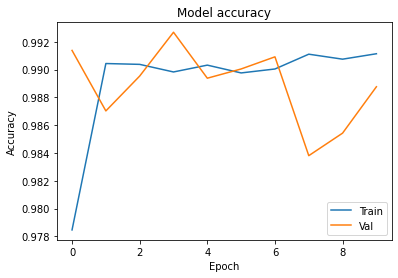

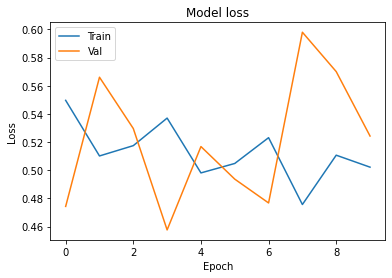

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'], label='Train')
plt.plot(history.history['val_categorical_accuracy'], label='Val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend() #['Train'], loc='upper left'
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend() #['Train'], loc='upper left'

plt.show()